In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import tree
import graphviz
from sklearn.model_selection import GridSearchCV

In [11]:
usData = pd.read_csv('../Data/YouTube/cleaned_us.csv')
usData['trending_date'] = '20' + usData['trending_date']
usData['trending_date'] = pd.to_datetime(usData['trending_date'],format='%Y.%d.%m')

In [12]:
usData.head(3)

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs


In [13]:
sortedUSData = usData.sort_values('comment_count')

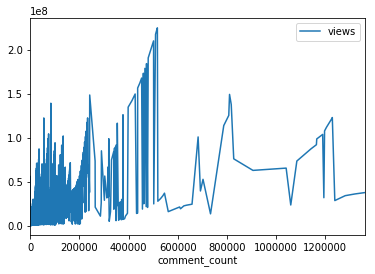

In [127]:
sortedUSData.plot.line(x='comment_count',y='views')

## The above doesn't show a huge relation between comment_count and the number of views a video has. Some videos with relatively low comment_count still have more or abou tthe same views as videos with higher comment_count

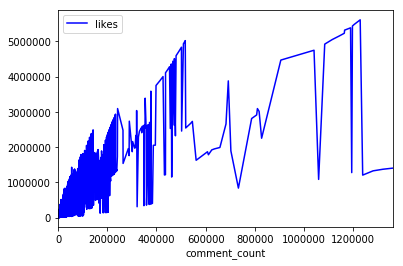

In [124]:
sortedUSData.plot.line(x='comment_count',y='likes', color='blue')

## From the above graph, we can see that the more comments a video has, the more likes it has. This is not always the case, but the graph shows that most videos do follow the above hypothesis. 

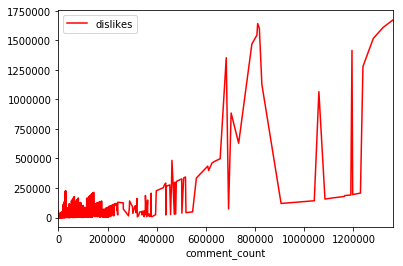

In [125]:
sortedUSData.plot.line(x='comment_count',y='dislikes',color='red')

## From the above graph, we can see that there is no relation between comment_count and dislikes. This is weird because I would've thought that the most disliked videos would have many comments making fun of the video. Even though we see many dislikes for videos with high comment_count, but I don't think it is enough to make conclusions but it will be useful insight for the future.

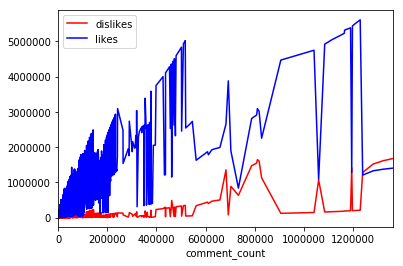

In [126]:
ax = plt.gca()
sortedUSData.plot.line(x='comment_count',y='dislikes',color='red', ax=ax)
sortedUSData.plot.line(x='comment_count',y='likes', color='blue', ax=ax)
plt.show()

## The reason why I drew both in the same plot is because they both seemed opposite to each other in some areas and the same in other areas. For example, around 800,000 comments, we see they follow the same pattern however, around 1,000,000, they are almost opposite to each other

In [15]:
 usData.sort_values('views', ascending=False).head(10)['comment_count']

31861    517232
31815    512337
31772    509799
31729    501722
31684    496211
31644    491005
31606    485797
31564    479917
31519    473039
31478    466470
Name: comment_count, dtype: int64

## From above, we can see that videos that have between 400,000 and 600,000 comments have the most views.

In [27]:
usData.head()

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,trending_month,trending_year
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,2017-11-13T17:13:01.000Z,shantell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs,11,2017
1,0mlNzVSJrT0,2017-11-14,Me-O Cats Commercial,Nobrand,2017-04-21T06:47:32.000Z,"cute,cats,thai,eggs",98966,2486,184,532,https://i.ytimg.com/vi/0mlNzVSJrT0/default.jpg,False,False,False,Kittens come out of the eggs in a Thai commerc...,People & Blogs,11,2017
2,STI2fI7sKMo,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,2017-11-11T15:00:03.000Z,"shawn johnson,andrew east,shawn east,shawn and...",321053,4451,1772,895,https://i.ytimg.com/vi/STI2fI7sKMo/default.jpg,False,False,False,Subscribe for weekly videos ▶ http://bit.ly/sj...,People & Blogs,11,2017
3,KODzih-pYlU,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,2017-11-11T18:08:04.000Z,"itsgrace,funny,comedy,vlog,grace,helbig,graceh...",197062,7250,217,456,https://i.ytimg.com/vi/KODzih-pYlU/default.jpg,False,False,False,Molly is an god damn amazing human and she cha...,People & Blogs,11,2017
4,8mhTWqWlQzU,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,2017-11-11T01:19:33.000Z,"wearing online dollar store makeup for a week,...",2744430,115426,1110,6541,https://i.ytimg.com/vi/8mhTWqWlQzU/default.jpg,False,False,False,I found this online dollar store called ShopMi...,People & Blogs,11,2017


## The below three graphs show the percentage of videos that either have comments disabled, ratings disabled, or have been removed or has an error.

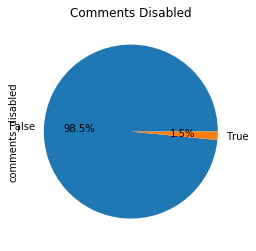

In [64]:
plt.title('Comments Disabled')
usData.comments_disabled.value_counts().plot(kind='pie',autopct='%1.1f%%')

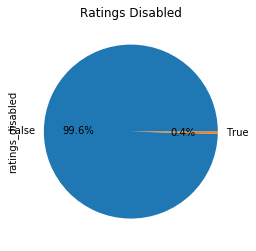

In [65]:
plt.title('Ratings Disabled')
usData.ratings_disabled.value_counts().plot(kind='pie',autopct='%1.1f%%')

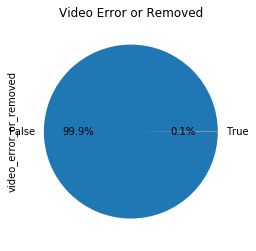

In [66]:
plt.title('Video Error or Removed')
usData.video_error_or_removed.value_counts().plot(kind='pie',autopct='%1.1f%%')

## These pie charts show the percentage of different things with true/false 

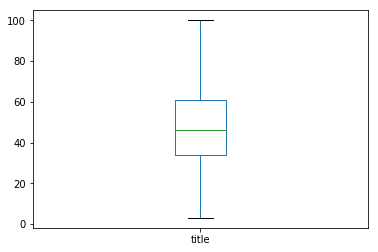

In [77]:
usData.title.str.len().plot.box()

## The box plot for video titles and their lengths. This box plot will help us determine what are the best title lengths for a video to be viral

## Box plot for video titles and their lengths

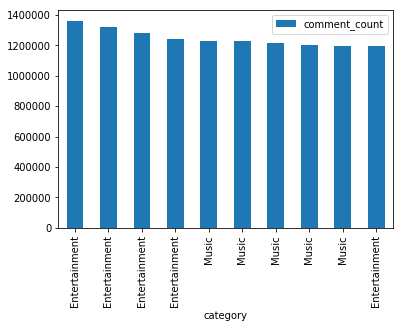

In [86]:
usData.sort_values(by='comment_count', ascending=False).head(10).plot.bar(x='category',y='comment_count')

## Most commented on videos based on category

In [135]:
ukData = pd.read_csv('../Data/Youtube/GBvideos.csv')

In [136]:
ukData.title.value_counts()

Maroon 5 - Wait                                                                                     40
To Our Daughter                                                                                     38
Anne-Marie - 2002 [Official Video]                                                                  38
Justin Timberlake’s FULL Pepsi Super Bowl LII Halftime Show! | NFL Highlights                       38
Jurassic World: Fallen Kingdom - Official Trailer #2 [HD]                                           38
Janelle Monáe – Make Me Feel [Official Music Video]                                                 37
Sam Smith - Pray (Official Video) ft. Logic                                                         37
Enrique Iglesias - MOVE TO MIAMI (Official Video) ft. Pitbull                                       37
Rich Brian - Cold (Official Music Video)                                                            37
VENOM - Official Teaser Trailer (HD)                                     

In [139]:
usData[usData.title=='Maroon 5 - Wait']

,video_id,trending_date,title,channel_title,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category,trending_month,trending_year
27941,TnCa71iUVxA,2018-01-18,Maroon 5 - Wait,Maroon5VEVO,2018-01-17T17:00:03.000Z,"maroon,wait,222,records/interscope,records,pop",692807,70211,2689,5205,https://i.ytimg.com/vi/TnCa71iUVxA/default.jpg,False,False,False,RED PILL BLUES” is out now.\nhttp://smarturl.i...,Music,1,2018
27964,TnCa71iUVxA,2018-01-19,Maroon 5 - Wait,Maroon5VEVO,2018-01-17T17:00:03.000Z,"maroon,wait,222,records/interscope,records,pop",1752229,129155,4940,7555,https://i.ytimg.com/vi/TnCa71iUVxA/default.jpg,False,False,False,RED PILL BLUES” is out now.\nhttp://smarturl.i...,Music,1,2018
27989,TnCa71iUVxA,2018-01-20,Maroon 5 - Wait,Maroon5VEVO,2018-01-17T17:00:03.000Z,"maroon,wait,222,records/interscope,records,pop",2759438,174489,6096,9064,https://i.ytimg.com/vi/TnCa71iUVxA/default.jpg,False,False,False,RED PILL BLUES” is out now.\nhttp://smarturl.i...,Music,1,2018
28013,TnCa71iUVxA,2018-01-21,Maroon 5 - Wait,Maroon5VEVO,2018-01-17T17:00:03.000Z,"maroon,wait,222,records/interscope,records,pop",3567363,203773,6854,9857,https://i.ytimg.com/vi/TnCa71iUVxA/default.jpg,False,False,False,RED PILL BLUES” is out now.\nhttp://smarturl.i...,Music,1,2018
28038,TnCa71iUVxA,2018-01-22,Maroon 5 - Wait,Maroon5VEVO,2018-01-17T17:00:03.000Z,"maroon,wait,222,records/interscope,records,pop",4275831,225213,7342,10503,https://i.ytimg.com/vi/TnCa71iUVxA/default.jpg,False,False,False,RED PILL BLUES” is out now.\nhttp://smarturl.i...,Music,1,2018
28061,TnCa71iUVxA,2018-01-23,Maroon 5 - Wait,Maroon5VEVO,2018-01-17T17:00:03.000Z,"maroon,wait,222,records/interscope,records,pop",4994006,242031,7817,10810,https://i.ytimg.com/vi/TnCa71iUVxA/default.jpg,False,False,False,RED PILL BLUES” is out now.\nhttp://smarturl.i...,Music,1,2018
28086,TnCa71iUVxA,2018-01-24,Maroon 5 - Wait,Maroon5VEVO,2018-01-17T17:00:03.000Z,"maroon,wait,222,records/interscope,records,pop",5668569,254875,8187,11138,https://i.ytimg.com/vi/TnCa71iUVxA/default.jpg,False,False,False,RED PILL BLUES” is out now.\nhttp://smarturl.i...,Music,1,2018
28114,TnCa71iUVxA,2018-01-25,Maroon 5 - Wait,Maroon5VEVO,2018-01-17T17:00:03.000Z,"maroon,wait,222,records/interscope,records,pop",6353130,267032,8516,11456,https://i.ytimg.com/vi/TnCa71iUVxA/default.jpg,False,False,False,RED PILL BLUES” is out now.\nhttp://smarturl.i...,Music,1,2018
28540,4uTNVumfm84,2018-02-09,Maroon 5 - Wait,Maroon5VEVO,2018-02-08T14:00:00.000Z,"maroon,wait,222,records/interscope,records,pop",2455067,197019,3139,11356,https://i.ytimg.com/vi/4uTNVumfm84/default.jpg,False,False,False,RED PILL BLUES” is out now.\nhttp://smarturl.i...,Music,2,2018
28561,4uTNVumfm84,2018-02-10,Maroon 5 - Wait,Maroon5VEVO,2018-02-08T14:00:00.000Z,"maroon,wait,222,records/interscope,records,pop",5163583,279830,5231,14956,https://i.ytimg.com/vi/4uTNVumfm84/default.jpg,False,False,False,RED PILL BLUES” is out now.\nhttp://smarturl.i...,Music,2,2018
